<a href="https://colab.research.google.com/github/Greta-gerasimov/PyT/blob/L2_feed_f/2_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np

from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

In [3]:
from tqdm import tqdm

100%|██████████| 170498071/170498071 [00:05<00:00, 29757292.69it/s]


Extracting C:/Users/Kate/Desktop/PT/l2/cifar-10-python.tar.gz to C:/Users/Kate/Desktop/PT/l2
torch.Size([3, 32, 32])
6
Files already downloaded and verified


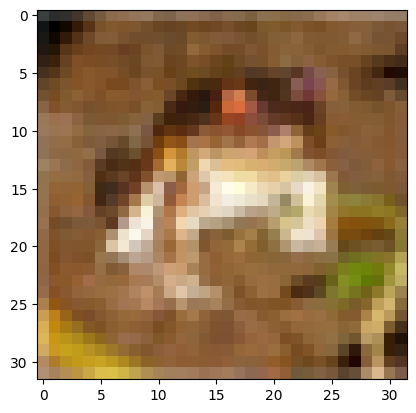

In [4]:
FOLDER_PATH = 'C:/Users/Kate/Desktop/PT/l2'

train_dataset = torchvision.datasets.CIFAR10(root=FOLDER_PATH,
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

plt.imshow(image.permute(1, 2, 0).numpy())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64,
                                           shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root=FOLDER_PATH,
                                            train=False,
                                            download=True,
                                            transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=8,
                                          shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')





In [5]:
# Создайте собственную архитектуру! Можете использовать все, что угодно,
# но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации
def LeakyRelu(input):
    return torch.max(0.1*input, 0.5*input)

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 16 * hidden_dim)
        self.fc2 = nn.Linear(16 * hidden_dim, 8 * hidden_dim)
        self.fc3 = nn.Linear(8 * hidden_dim, 4 * hidden_dim)
        self.fc4 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc5 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc6 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = LeakyRelu(x)
        x = self.fc2(x)
        x = LeakyRelu(x)
        x = self.fc3(x)
        x = LeakyRelu(x)
        x = self.fc4(x)
        x = LeakyRelu(x)
        x = self.fc5(x)
        x = LeakyRelu(x)
        x = self.fc6(x)
        return x

    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = LeakyRelu(x)
        x = self.fc2(x)
        x = LeakyRelu(x)
        x = self.fc3(x)
        x = LeakyRelu(x)
        x = self.fc4(x)
        x = LeakyRelu(x)
        x = self.fc5(x)
        x = LeakyRelu(x)
        x = self.fc6(x)
        x = F.softmax(x)
        return x


model = Net(3072, 256, 10)
model.train()




Net(
  (fc1): Linear(in_features=3072, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=2048, bias=True)
  (fc3): Linear(in_features=2048, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=256, bias=True)
  (fc6): Linear(in_features=256, out_features=10, bias=True)
)

In [6]:

num_epochs = 30

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

from tqdm import tqdm


for epoch in tqdm(range(num_epochs)):
    running_loss = 0.0



    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|          | 0/30 [00:00<?, ?it/s]

[1,     1] loss: 0.001
[1,   301] loss: 0.311
[1,   601] loss: 0.288


  3%|▎         | 1/30 [04:40<2:15:24, 280.14s/it]

[2,     1] loss: 0.001
[2,   301] loss: 0.272
[2,   601] loss: 0.267


  7%|▋         | 2/30 [09:18<2:10:17, 279.19s/it]

[3,     1] loss: 0.001
[3,   301] loss: 0.258
[3,   601] loss: 0.253


 10%|█         | 3/30 [14:00<2:06:06, 280.24s/it]

[4,     1] loss: 0.001
[4,   301] loss: 0.244
[4,   601] loss: 0.240


 13%|█▎        | 4/30 [18:41<2:01:41, 280.83s/it]

[5,     1] loss: 0.001
[5,   301] loss: 0.235
[5,   601] loss: 0.232


 17%|█▋        | 5/30 [23:21<1:56:51, 280.48s/it]

[6,     1] loss: 0.001
[6,   301] loss: 0.226
[6,   601] loss: 0.224


 20%|██        | 6/30 [27:56<1:51:28, 278.67s/it]

[7,     1] loss: 0.001
[7,   301] loss: 0.220
[7,   601] loss: 0.220


 23%|██▎       | 7/30 [32:33<1:46:32, 277.92s/it]

[8,     1] loss: 0.001
[8,   301] loss: 0.216
[8,   601] loss: 0.214


 27%|██▋       | 8/30 [37:09<1:41:40, 277.30s/it]

[9,     1] loss: 0.001
[9,   301] loss: 0.208
[9,   601] loss: 0.208


 30%|███       | 9/30 [41:48<1:37:17, 277.95s/it]

[10,     1] loss: 0.001
[10,   301] loss: 0.204
[10,   601] loss: 0.207


 33%|███▎      | 10/30 [46:28<1:32:51, 278.59s/it]

[11,     1] loss: 0.001
[11,   301] loss: 0.200
[11,   601] loss: 0.198


 37%|███▋      | 11/30 [51:09<1:28:25, 279.21s/it]

[12,     1] loss: 0.001
[12,   301] loss: 0.196
[12,   601] loss: 0.195


 40%|████      | 12/30 [55:48<1:23:45, 279.18s/it]

[13,     1] loss: 0.000
[13,   301] loss: 0.190
[13,   601] loss: 0.191


 43%|████▎     | 13/30 [1:00:26<1:19:01, 278.89s/it]

[14,     1] loss: 0.001
[14,   301] loss: 0.187
[14,   601] loss: 0.187


 47%|████▋     | 14/30 [1:05:08<1:14:37, 279.84s/it]

[15,     1] loss: 0.001
[15,   301] loss: 0.184
[15,   601] loss: 0.185


 50%|█████     | 15/30 [1:09:54<1:10:25, 281.67s/it]

[16,     1] loss: 0.001
[16,   301] loss: 0.180
[16,   601] loss: 0.181


 53%|█████▎    | 16/30 [1:14:44<1:06:16, 284.05s/it]

[17,     1] loss: 0.001
[17,   301] loss: 0.177
[17,   601] loss: 0.176


 57%|█████▋    | 17/30 [1:19:22<1:01:11, 282.40s/it]

[18,     1] loss: 0.001
[18,   301] loss: 0.172
[18,   601] loss: 0.173


 60%|██████    | 18/30 [1:24:03<56:24, 282.02s/it]  

[19,     1] loss: 0.001
[19,   301] loss: 0.169
[19,   601] loss: 0.170


 63%|██████▎   | 19/30 [1:28:45<51:39, 281.81s/it]

[20,     1] loss: 0.001
[20,   301] loss: 0.163
[20,   601] loss: 0.167


 67%|██████▋   | 20/30 [1:33:26<46:57, 281.76s/it]

[21,     1] loss: 0.000
[21,   301] loss: 0.161
[21,   601] loss: 0.162


 70%|███████   | 21/30 [1:38:08<42:14, 281.60s/it]

[22,     1] loss: 0.000
[22,   301] loss: 0.160
[22,   601] loss: 0.158


 73%|███████▎  | 22/30 [1:42:48<37:30, 281.32s/it]

[23,     1] loss: 0.000
[23,   301] loss: 0.153
[23,   601] loss: 0.157


 77%|███████▋  | 23/30 [1:47:29<32:47, 281.13s/it]

[24,     1] loss: 0.000
[24,   301] loss: 0.149
[24,   601] loss: 0.154


 80%|████████  | 24/30 [1:52:10<28:06, 281.14s/it]

[25,     1] loss: 0.000
[25,   301] loss: 0.146
[25,   601] loss: 0.148


 83%|████████▎ | 25/30 [1:56:50<23:23, 280.72s/it]

[26,     1] loss: 0.001
[26,   301] loss: 0.140
[26,   601] loss: 0.144


 87%|████████▋ | 26/30 [2:01:29<18:40, 280.21s/it]

[27,     1] loss: 0.000
[27,   301] loss: 0.138
[27,   601] loss: 0.141


 90%|█████████ | 27/30 [2:06:06<13:58, 279.40s/it]

[28,     1] loss: 0.000
[28,   301] loss: 0.134
[28,   601] loss: 0.138


 93%|█████████▎| 28/30 [2:10:44<09:17, 278.91s/it]

[29,     1] loss: 0.000
[29,   301] loss: 0.130
[29,   601] loss: 0.135


 97%|█████████▋| 29/30 [2:15:25<04:39, 279.46s/it]

[30,     1] loss: 0.000
[30,   301] loss: 0.128
[30,   601] loss: 0.132


100%|██████████| 30/30 [2:20:06<00:00, 280.20s/it]

Training is finished!


Model state dict:
fc1.weight 	 OrderedDict([('fc1.weight', tensor([[ 0.0856,  0.0874,  0.0267,  ..., -0.0399, -0.0726,  0.0004],
        [-0.0741, -0.0923, -0.1344,  ...,  0.0511,  0.0727,  0.1654],
        [ 0.1352,  0.1359,  0.1411,  ...,  0.1584,  0.0617,  0.0416],
        ...,
        [-0.1371, -0.1781, -0.1276,  ...,  0.0143,  0.0032,  0.0325],
        [ 0.1277,  0.1707,  0.1739,  ...,  0.0877, -0.0010,  0.0453],
        [-0.0302, -0.0310, -0.0442,  ...,  0.0739,  0.0425, -0.0679]])), ('fc1.bias', tensor([ 0.1381, -0.2494,  0.4668,  ..., -0.5455,  0.8265,  0.0784])), ('fc2.weight', tensor([[-0.0207, -0.0893, -0.0440,  ...,  0.1246, -0.0769, -0.0581],
        [-0.0530, -0.0659, -0.0471,  ...,  0.0169, -0.0586, -0.0227],
        [ 0.1747, -0.1080,  0.0775,  ...,  0.1402,  0.1335, -0.0239],
        ...,
        [ 0.0147, -0.1030, -0.0218,  ...,  0.0049, -0.0768, -0.1000],
        [-0.0334,  0.0312, -0.0491,  ..., -0.2174,  0.0403,  0.0139],
        [-0.0092, -0.0321, -0.0312,  ..., -

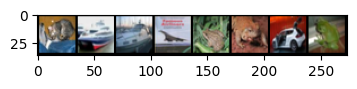

In [11]:

PATH_WEIGHTS = 'C:/Users/Kate/Desktop/PT/l2/cifar_model_weight.pth'
torch.save(model.state_dict(), PATH_WEIGHTS)

print ('Model state dict:')
for param in model.state_dict():
    print(param, '\t', model.state_dict())

model = Net(3072, 256, 10)
model.load_state_dict(torch.load(PATH_WEIGHTS))
model

data_iter = iter(test_loader)
images, labels = next(data_iter)

model.eval()
outputs = model(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(4, 2))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))





In [12]:

model.predict(images);

<ipython-input-5-5dc77d49d9e4>:46: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


In [13]:
_, imgs_predicted = torch.max(outputs, 1)
imgs_predicted

print('Predicted ', ' '.join(classes[imgs_predicted[j]] for j in range(len(labels))))


Predicted  cat ship plane horse deer frog car frog


In [14]:

gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[imgs_predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'ship' 'plane' 'horse' 'deer' 'frog' 'car' 'frog']
Accuracy is 0.625
